## APPROACH 1

Stable Diffusion Pipeline:

Generates diverse images from textual prompts using the runwayml/stable-diffusion-v1-5 model variant in half-precision (fp16), optimized for speed and memory efficiency.
Displays generated images inline in a Google Colab notebook environment after converting them to bytes for visualization.

In [11]:
c# Install required packages
!pip install torch torchvision transformers diffusers accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 5.7 MB/s eta 0:00:00


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

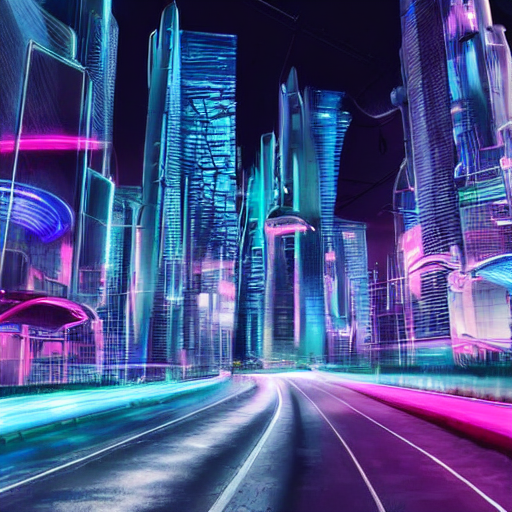

  0%|          | 0/50 [00:00<?, ?it/s]

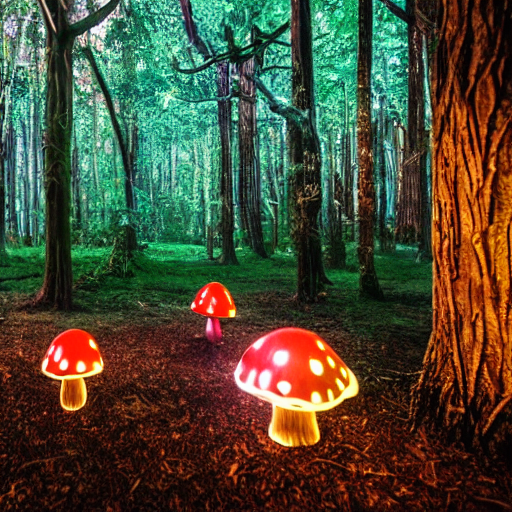

  0%|          | 0/50 [00:00<?, ?it/s]

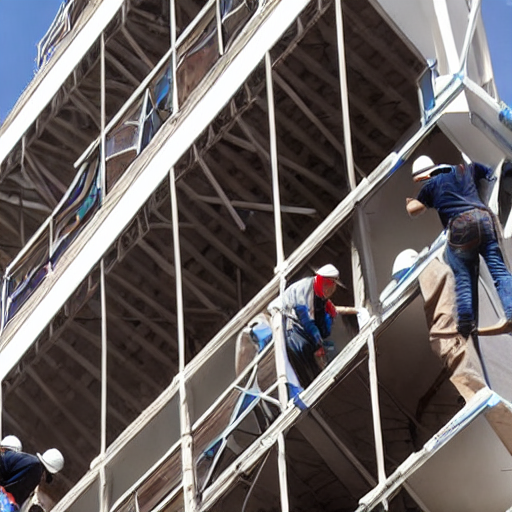

In [15]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from io import BytesIO
from IPython import display

# Define the model ID and variant for memory efficiency
model_id = "runwayml/stable-diffusion-v1-5"
variant = "fp16"  # Using the fp16 (half-precision) version of the model

# Load the pipeline with the fp16 variant
pipe = StableDiffusionPipeline.from_pretrained(model_id, variant=variant, torch_dtype=torch.float16)

# Move the pipeline to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = pipe.to(device)

# Define multiple prompts
prompts = [
    "a futuristic cityscape with flying cars and neon lights at dusk",
    "a magical forest with glowing mushrooms and ethereal creatures",
    "a group of an engineers constructing a building"
]

# For reproducibility
generator = torch.Generator().manual_seed(0)

# Clear GPU cache to avoid memory issues
torch.cuda.empty_cache()

# Generate images for each prompt
for prompt in prompts:
    # Generate image
    image = pipe(prompt, generator=generator).images[0]

    # Convert image to bytes
    image_bytes = BytesIO()
    image.save(image_bytes, format='PNG')
    image_bytes = image_bytes.getvalue()

    # Display image inline in Colab notebook
    display.display(display.Image(data=image_bytes))


## APPROACH 2

Waifu, OrangeMix, and Realisian Models:
Uses various diffusion models (hakurei/waifu-diffusion, OrangeMix, and digiplay/Realisian_v5) with fp16 precision and CUDA acceleration.
Generates high-quality images from prompts, leveraging mediapy for visualization and ensuring efficient GPU processing for realistic and diverse outputs.

In [16]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy omegaconf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00


In [17]:
!pip install omegaconf
use_refiner = False

In [18]:
#@title Realisian Model
# @markdown **Realisian Model** [OUTPUT EXAMPLE](https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/ab5b700f-1cc6-408a-bac2-1d3cc38be280/width=450/00001-20230712095453.jpeg)

import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained(
    "digiplay/Realisian_v5",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    safety_checker = None,
    requires_safety_checker = False
    )

pipe = pipe.to("cuda")


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
# #@title ORANGEMIX MODEL
# #@markdown **ORANGE MIX MODEL** [OUTPUT EXAMPLE](https://raw.githubusercontent.com/WarriorMama777/imgup/2c840982550fab41f45ba4b5aedbd3d84ddf2390/img/AOM3/img_sanmples_AOM3_01_comp001.webp)

# import mediapy as media
# import random
# import sys
# import torch

# from diffusers import StableDiffusionPipeline

# pipe = StableDiffusionPipeline.from_single_file(
#     "https://huggingface.co/WarriorMama777/OrangeMixs/blob/main/Models/AbyssOrangeMix3/AOM3_orangemixs.safetensors",
#     torch_dtype=torch.float16,
#     use_safetensors=True,
#     variant="fp16",
#     safety_checker = None,
#     requires_safety_checker = False
#     )

# pipe = pipe.to("cuda")

In [ ]:
# #@title WAIFU DIFFUSION MODEL
# # @markdown **WAIFU DIFFUSION MODEL** [OUTPUT EXAMPLE](https://user-images.githubusercontent.com/26317155/210155933-db3a5f1a-1ec3-4777-915c-6deff2841ce9.png)
# import mediapy as media
# import random
# import sys
# import torch

# from diffusers import DiffusionPipeline

# pipe = DiffusionPipeline.from_pretrained(
#     "hakurei/waifu-diffusion",
#     torch_dtype=torch.float16,
#     use_safetensors=True,
#     variant="fp16",
#     safety_checker = None,
#     requires_safety_checker = False
#     )

# pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Prompt:	engineer c onstructing a building
Seed:	3798779956670909893


""

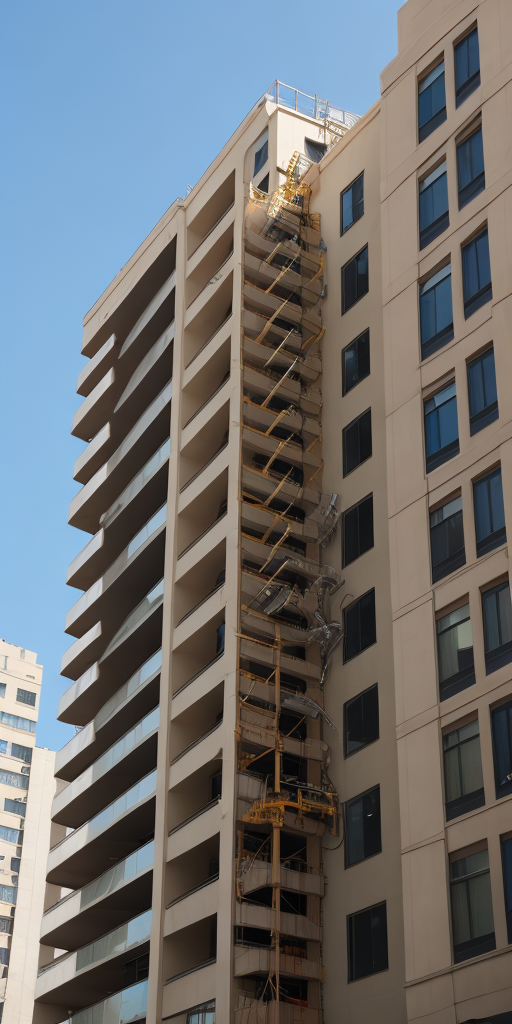

In [19]:
# @title PROMPT, GUNAKAN BAHASA INGGRIS / USE ENGLISH { display-mode: "form" }
import os
prompt = "engineer c onstructing a building" #@param {type:"string"}
seed = random.randint(0, sys.maxsize)

negative_prompt = "bad-picture-chill-75v, ng_deepnegative_v1_75t, badhandv4, (worst quality:2), (low quality:2), (normal quality:2), (lowres:2), (bad anatomy:2), (bad hands:2), (watermark:2), (mole:1.5), (freckles:1.5)" #@param {type:"string"}

width = 512  #@param {type:"integer"}
height = 1024  #@param {type:"integer"}

# Mengambil nilai dari widget param
width = int(width)
height = int(height)

images = pipe(
    prompt=prompt,
    width=width,
    height=height,
    negative_prompt=negative_prompt,
    output_type="latent" if use_refiner else "pil",
    generator=torch.Generator().manual_seed(seed)
).images


if use_refiner:
  images = refiner(
      prompt = prompt,
      negative_prompt = negative_prompt,
      image = images,
      ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")

# Nama file yang akan digunakan
base_filename = "output.jpg"
new_filename = base_filename

# Cek apakah file dengan nama yang sama sudah ada
if os.path.exists(base_filename):
    # Jika sudah ada, tambahkan angka di belakangnya
    index = 1
    while True:
        new_filename = f"output_{index}.jpg"
        if not os.path.exists(new_filename):
            break
        index += 1

# Simpan gambar dengan nama yang telah ditentukan
images[0].save(new_filename)

# Menampilkan gambar
media.show_images(images)


## Diff Btw APPROACH 1 AND APPROACH 2

In summary, while both approaches involve generating images from prompts using diffusion models, the specific models used, their optimizations, and the intended artistic or visual outcomes distinguish these approaches from each other.







